In [1]:
import xarray as xr
import numpy as np
import numpy as np
import xarray as xr
import os
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

In [2]:
#file where i have number of sign ificant countries that predic yearly increase power
# this one does not have which ones are the significant ones
#rel cols: model, signif_ttest. per country, per model. ISO A2
summary_yearly_power = pd.read_csv('solar_country_model_stats.csv')

In [3]:
# file where i have number of significant models that predict yearly decrease in number of drought days per year
# relevant columns: model, country (ISOA3), significant
csv_path_droughts = os.path.join(
    "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/power",
    "country_drought_stats_BOC_vs_EOC.csv")
summary_drought_yearly = pd.read_csv(csv_path_droughts)


In [9]:
import pandas as pd
import os

# 1. Load datasets
summary_yearly_power = pd.read_csv('solar_country_model_stats.csv')  # contains ISO_A2
csv_path_droughts = os.path.join(
    "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/power",
    "country_drought_stats_BOC_vs_EOC.csv"
)
summary_drought_yearly = pd.read_csv(csv_path_droughts)  # contains ISOA3

# 2. Country list
EU27 = [
    'AT','BE','BG','HR','CZ','DK','EE','FI','FR','DE','GR',
    'HU','IE','IT','LV','LT','LU','MT','NL','PL','PT','RO',
    'SK','SI','ES','SE','CY'
]
extras = ['GB', 'NO', 'BA', 'ME', 'RS', 'AL', 'MK', 'CH', 'IS', 'TR', 'UA', 'BY', 'MD', 'RU', 'XK']
countries_of_interest = EU27 + extras

# 3. If needed: convert ISOA3 to ISOA2 for drought file
import country_converter as coco
cc = coco.CountryConverter()

# Convert ISO3 to ISO2 where possible
summary_drought_yearly["ISO_A2"] = cc.convert(
    names=summary_drought_yearly["country"],
    to="ISO2",
    not_found=np.nan
)

# Manually assign XK to Kosovo entries
summary_drought_yearly.loc[summary_drought_yearly["country"] == "KOS", "ISO_A2"] = "XK"
# 4. Filter significant models per country
# For power: significance = True
power_sig = summary_yearly_power[summary_yearly_power["signif_ttest"] == True]

# For droughts: significance = True (assuming it means decrease in drought days)
drought_sig = summary_drought_yearly[summary_drought_yearly["significant"] == True]

## Clean and normalize model names globally
power_sig["model"] = power_sig["model"].astype(str).str.strip().str.lower()
drought_sig["model"] = drought_sig["model"].astype(str).str.strip().str.lower()

# Drop duplicates just in case
power_sig = power_sig.drop_duplicates(subset=["ISO_A2", "model"])
drought_sig = drought_sig.drop_duplicates(subset=["ISO_A2", "model"])

# 6. Prepare output
results = []

for country in countries_of_interest:
    models_power = set(power_sig[power_sig["ISO_A2"] == country]["model"])
    models_drought = set(drought_sig[drought_sig["ISO_A2"] == country]["model"])
    models_both = models_power & models_drought

    results.append({
        "country": country,
        "models_power": len(models_power),
        "models_drought": len(models_drought),
        "models_both": len(models_both)
    })


# 7. Convert to DataFrame
df_agreement = pd.DataFrame(results)

# ✅ Display or export
print(df_agreement)
# df_agreement.to_csv("agreement_power_drought_models.csv", index=False)


KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
/tmp/ipykernel_13040/2193800188.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_sig["model"] = power_sig["model"].astype(str).str.strip().str.lower()
/tmp/ipykernel_13040/2193800188.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drought_sig["model"] = drought_sig["model"].astype(str).str.strip().str.lower()


   country  models_power  models_drought  models_both
0       AT             6               6            6
1       BE             7               5            5
2       BG             7               6            6
3       HR             6               7            6
4       CZ             6               5            5
5       DK             6               5            5
6       EE             6               5            4
7       FI             5               7            5
8       FR             7               7            7
9       DE             7               6            6
10      GR             7               7            7
11      HU             6               6            6
12      IE             5               1            0
13      IT             6               7            6
14      LV             6               6            5
15      LT             6               6            5
16      LU             7               0            0
17      MT             7    

In [10]:
country = "EE"
mp = set(power_sig[power_sig["ISO_A2"] == country]["model"])
md = set(drought_sig[drought_sig["ISO_A2"] == country]["model"])
print("Power models:", sorted(mp))
print("Drought models:", sorted(md))
print("Common models:", sorted(mp & md))


Power models: ['access-cm2', 'cmcc-cm2-sr5', 'cmcc-esm2', 'hadgem3-gc31-ll', 'hadgem3-gc31-mm', 'mri-esm2-0']
Drought models: ['access-cm2', 'canesm5', 'cmcc-esm2', 'hadgem3-gc31-ll', 'hadgem3-gc31-mm']
Common models: ['access-cm2', 'cmcc-esm2', 'hadgem3-gc31-ll', 'hadgem3-gc31-mm']


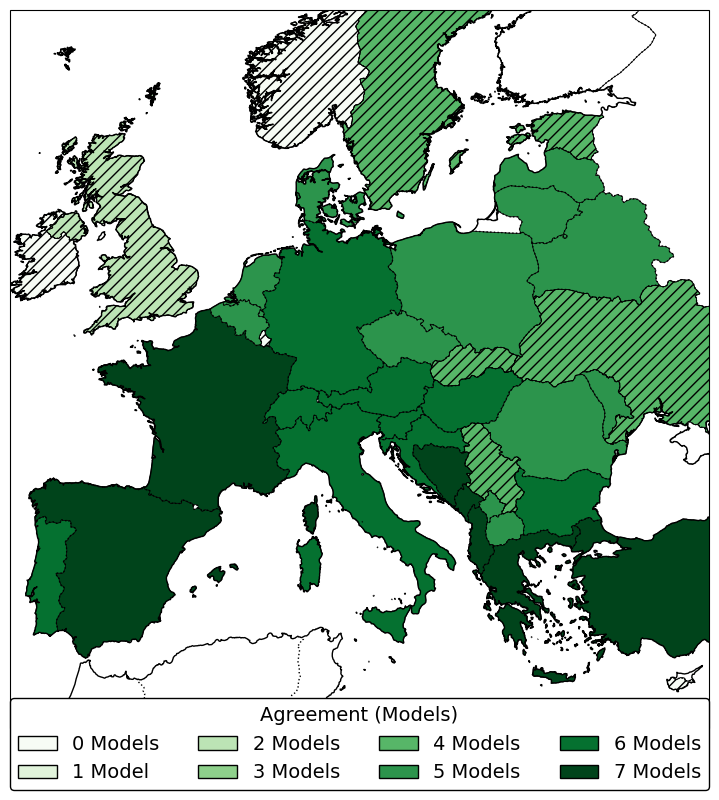

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.patches as mpatches
import math
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.patches as mpatches
import math

# ─── 1) Define your region (EU27 + extras) ─────────────────────────────
EU27 = [
    'AT','BE','BG','HR','CZ','DK','EE','FI','FR','DE','GR',
    'HU','IE','IT','LV','LT','LU','MT','NL','PL','PT','RO',
    'SK','SI','ES','SE','CY'
]
extras = ['GB','NO','BA','ME','RS','AL','MK','CH','IS','TR','UA','BY','MD','RU','XK']
region_codes = EU27 + extras

# ─── 2) Load Natural Earth countries ───────────────────────────────────
ne50 = "https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_countries.zip"
world = gpd.read_file(ne50).to_crs("EPSG:4326")

# Force Kosovo and France
world.loc[world['NAME_LONG'] == 'France', 'ISO_A2'] = 'FR'
world.loc[world['NAME_LONG'] == 'Norway', 'ISO_A2'] = 'NO'
world.loc[world['NAME_LONG'] == 'Kosovo', 'ISO_A2'] = 'XK'

# ─── 3) Filter to Europe and keep only geometry ────────────────────────
eu = world[world['ISO_A2'].isin(region_codes)][['ISO_A2', 'geometry']].copy()
# ─── 1) Merge agreement into GeoDataFrame ────────────────────────────
# Assume you have a df_agreement with 'country' (ISO_A2) and 'models_both'
eu = eu.merge(df_agreement[['country', 'models_both']], left_on='ISO_A2', right_on='country', how='left')
eu['models_both'] = eu['models_both'].fillna(0).astype(int)

# Optional: mask countries if needed (e.g. RU, FI)
eu.loc[eu['ISO_A2'].isin(['RU', 'FI']), 'models_both'] = np.nan

# ─── 2) Create discrete colormap ─────────────────────────────────────
max_models = int(eu['models_both'].max(skipna=True))
cmap = plt.get_cmap('Greens', max_models + 1)

# ─── 3) Create the map ───────────────────────────────────────────────
fig, ax = plt.subplots(
    figsize=(12, 8),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

# Choropleth map
eu.plot(
    column='models_both',
    cmap=cmap,
    linewidth=0.5,
    edgecolor='black',
    ax=ax,
    legend=False,
    missing_kwds={'color': 'white'}
)

# Overlay hatching for low agreement (<5 models)
low_agree = eu[eu['models_both'] < 5]
low_agree.plot(
    ax=ax,
    facecolor='none',
    edgecolor='black',
    hatch='///',
    linewidth=0.5,
    zorder=3
)

# Coastlines and borders
ax.coastlines('10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-10.5, 35, 33, 64], crs=ccrs.PlateCarree())
lat0 = (33 + 64) / 2.0
ax.set_aspect(1.0 / np.cos(np.deg2rad(lat0)))

# ─── 4) Legend construction ──────────────────────────────────────────
patches = [
    mpatches.Patch(
        facecolor=cmap(i),
        edgecolor='black',
        linewidth=1,
        label=f"{i} Model{'s' if i != 1 else ''}"
    )
    for i in range(max_models + 1)
]

ncols = math.ceil((max_models + 1) / 2)

leg = ax.legend(
    handles=patches,
    title='Agreement (Models)',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1),
    fontsize=14,
    title_fontsize=14,
    frameon=True,
    edgecolor='black',
    ncol=ncols
)
leg.get_frame().set_alpha(1)

plt.tight_layout()
# Optional: save
# plt.savefig('model_agreement_map.pdf', dpi=300, bbox_inches='tight')
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/agreement_power_and_droughts.pdf", bbox_inches='tight', dpi=300)
plt.show()


In [11]:
#seasonal analysis. columns: IsoA2, model, signif_ttest
csv_power_seasonal=pd.read_csv("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/solar_model_stats_per_season.csv")
#seasonal analysis for droughts. relevant columns: model, country (ISOA3), significant
csv_drought_days_seasonal=pd.read_csv("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/power/country_seasonal_era5_vs_boc_days.csv")

In [16]:
import pandas as pd
import numpy as np
from country_converter import CountryConverter

# 1. Load seasonal CSVs
csv_power_seasonal = pd.read_csv(
    "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/solar_model_stats_per_season.csv"
)
csv_drought_days_seasonal = pd.read_csv(
    "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/power/country_seasonal_drought_tests.csv"
)

# 2. Country list
EU27 = [
    'AT','BE','BG','HR','CZ','DK','EE','FI','FR','DE','GR',
    'HU','IE','IT','LV','LT','LU','MT','NL','PL','PT','RO',
    'SK','SI','ES','SE','CY'
]
extras = ['GB', 'NO', 'BA', 'ME', 'RS', 'AL', 'MK', 'CH', 'IS', 'TR', 'UA', 'BY', 'MD', 'RU', 'XK']
countries_of_interest = EU27 + extras

# 3. Convert drought data from ISO_A3 to ISO_A2
cc = CountryConverter()
csv_drought_days_seasonal["ISO_A2"] = cc.convert(
    names=csv_drought_days_seasonal["country"],
    to="ISO2",
    not_found=np.nan
)

# Handle Kosovo manually if needed
csv_drought_days_seasonal.loc[csv_drought_days_seasonal["country"] == "KOS", "ISO_A2"] = "XK"

# 4. Filter significant results
power_sig = csv_power_seasonal[csv_power_seasonal["signif_ttest"] == True]
drought_sig = csv_drought_days_seasonal[csv_drought_days_seasonal["significant"] == True]

# 5. Filter countries of interest
power_sig = power_sig[power_sig["ISO_A2"].isin(countries_of_interest)]
drought_sig = drought_sig[drought_sig["ISO_A2"].isin(countries_of_interest)]

# 6. Match by country, season, and model
results = []

for country in countries_of_interest:
    for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
        power_models = set(
            power_sig[
                (power_sig["ISO_A2"] == country) &
                (power_sig["season"] == season)
            ]["model"]
        )
        drought_models = set(
            drought_sig[
                (drought_sig["ISO_A2"] == country) &
                (drought_sig["season"] == season)
            ]["model"]
        )
        models_both = power_models & drought_models

        results.append({
            "country": country,
            "season": season,
            "models_power": len(power_models),
            "models_drought": len(drought_models),
            "models_both": len(models_both)
        })

# 7. Save or view the results
df_seasonal_agreement = pd.DataFrame(results)
print(df_seasonal_agreement)
# df_seasonal_agreement.to_csv("seasonal_model_agreement.csv", index=False)


KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3
KOS not found in ISO3


    country  season  models_power  models_drought  models_both
0        AT  Winter             7               0            0
1        AT  Spring             6               3            3
2        AT  Summer             7               7            7
3        AT  Autumn             7               5            5
4        BE  Winter             4               2            1
..      ...     ...           ...             ...          ...
163      RU  Autumn             6               3            2
164      XK  Winter             7               2            2
165      XK  Spring             6               3            3
166      XK  Summer             4               5            3
167      XK  Autumn             7               6            6

[168 rows x 5 columns]


In [13]:
df_seasonal_agreement

,country,season,models_power,models_drought,models_both
0,AT,Winter,7,7,7
1,AT,Spring,6,7,6
2,AT,Summer,7,5,5
3,AT,Autumn,7,5,5
4,BE,Winter,4,7,4
...,...,...,...,...,...
163,RU,Autumn,6,4,3
164,XK,Winter,7,7,7
165,XK,Spring,6,7,6
166,XK,Summer,4,4,4


In [14]:
# select all rows where the 'country' column equals 'SP'
df_seasonal_agreement[df_seasonal_agreement['country'] == 'FR']

,country,season,models_power,models_drought,models_both
32,FR,Winter,4,7,4
33,FR,Spring,5,7,5
34,FR,Summer,7,7,7
35,FR,Autumn,7,7,7


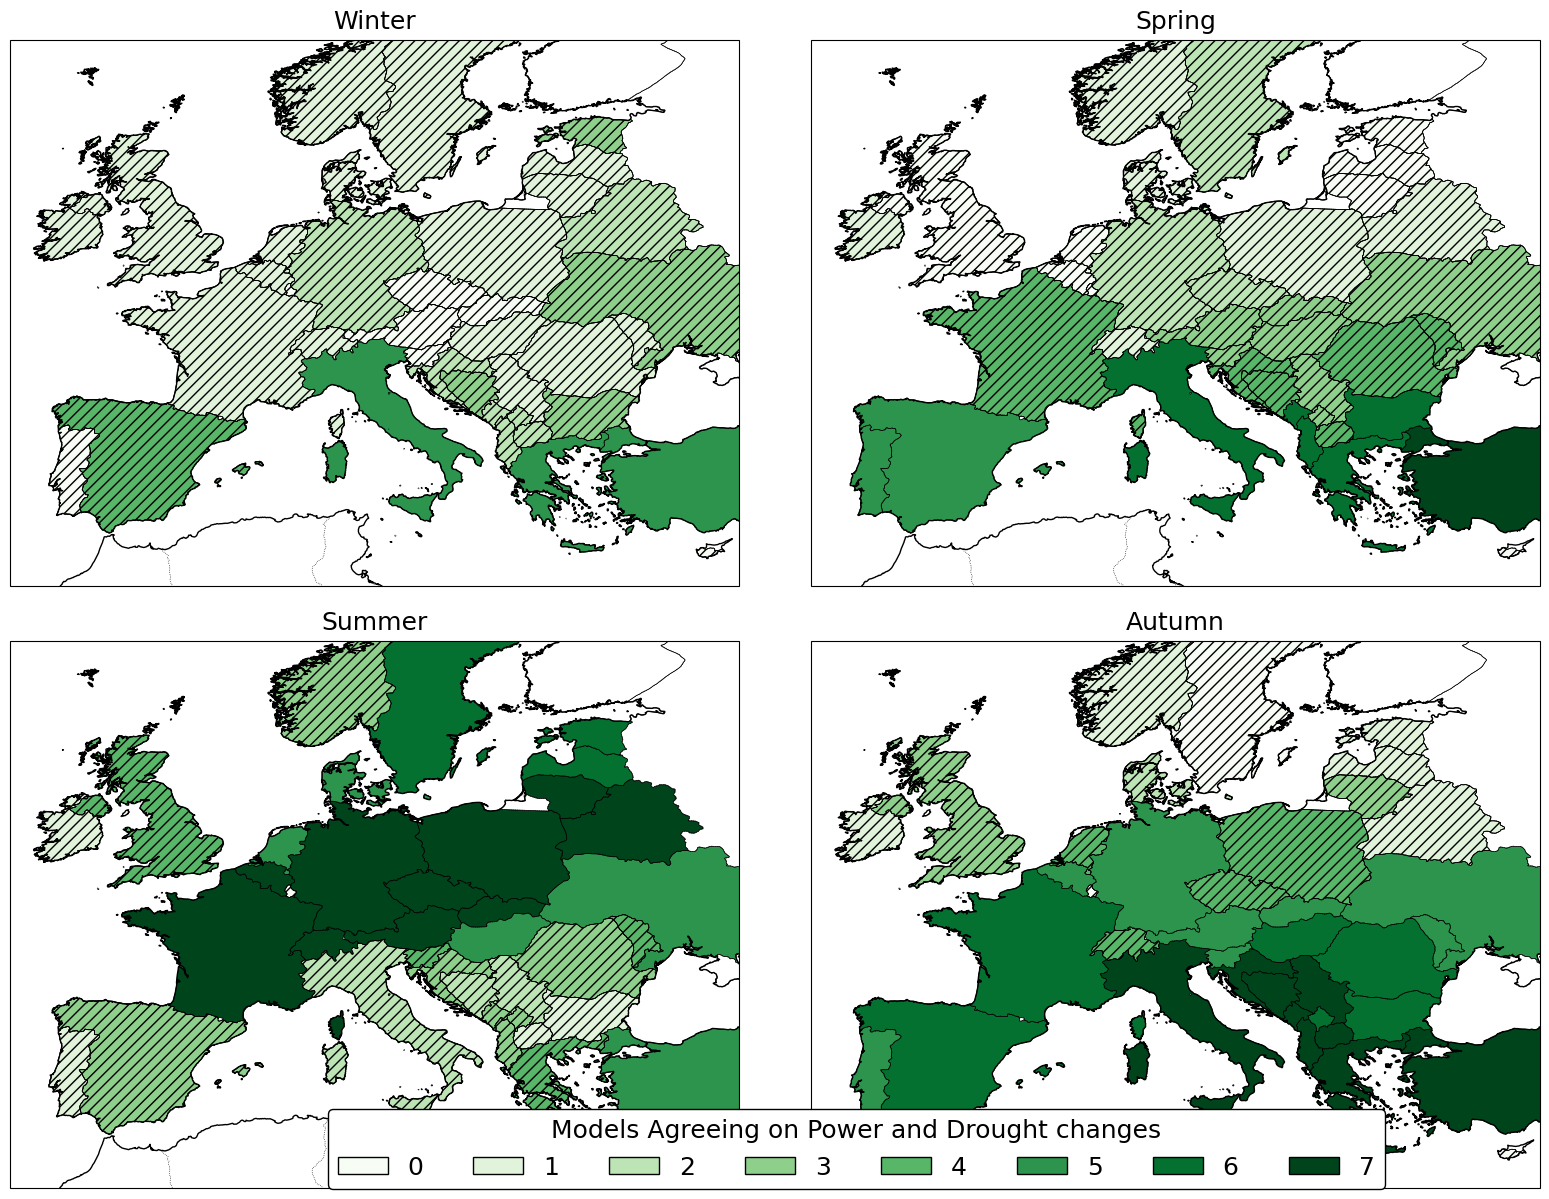

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# 1. Load seasonal agreement data
summary = df_seasonal_agreement.copy()

# 2. Regions
EU27 = [
    'AT','BE','BG','HR','CZ','DK','EE','FI','FR','DE','GR',
    'HU','IE','IT','LV','LT','LU','MT','NL','PL','PT','RO',
    'SK','SI','ES','SE','CY'
]
extras = [
    'GB','NO','BA','ME','RS','AL','MK','CH','IS','TR',
    'UA','BY','MD','RU','XK'
]
region_codes = EU27 + extras

# 3. Country geometries
ne50 = "https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_countries.zip"
world = gpd.read_file(ne50).to_crs("EPSG:4326")
world.loc[world.NAME_LONG=='France',  'ISO_A2'] = 'FR'
world.loc[world.NAME_LONG=='Norway',  'ISO_A2'] = 'NO'
world.loc[world.NAME_LONG.str.contains('Kosov', na=False), 'ISO_A2'] = 'XK'
eu = world[world.ISO_A2.isin(region_codes)][['ISO_A2','geometry']].copy()

# 4. Optional: rename season codes to readable titles
season_map = {
    'Winter': 'Winter',
    'Spring': 'Spring',
    'Summer': 'Summer',
    'Autumn': 'Autumn'
}
summary['season_title'] = summary['season'].map(season_map)

# 5. Prepare colormap
maxm = int(summary['models_both'].max())
cmap = plt.get_cmap('Greens', maxm+1)
norm = mpl.colors.BoundaryNorm(np.arange(maxm+2)-0.5, maxm+1)

# 6. Seasons and panel setup
seasons = ['Winter','Spring','Summer','Autumn']
fig, axes = plt.subplots(
    2, 2,
    figsize=(18, 14),
    subplot_kw={'projection': ccrs.PlateCarree()},
    constrained_layout=False
)

# 7. Plot per season
for ax, season in zip(axes.flat, seasons):
    df_seas = summary[summary['season_title'] == season]
    gdf = eu.merge(
        df_seas[['country','models_both']].rename(columns={'country':'ISO_A2'}),
        on='ISO_A2',
        how='left'
    )

    # Fill missing with 0 and convert to int
    gdf['models_both'] = gdf['models_both'].fillna(0).astype(int)
    gdf.loc[gdf['ISO_A2'].isin(['RU','FI']), 'models_both'] = np.nan

    # Main plot
    gdf.plot(
        column='models_both',
        cmap=cmap, norm=norm,
        linewidth=0.5, edgecolor='black',
        ax=ax,
        missing_kwds={'color':'white'}
    )

    # Hatch countries with low agreement (< 5 models)
    low = gdf[gdf['models_both'] < 5]
    low.plot(
        ax=ax,
        facecolor="none",
        edgecolor="black",
        hatch='///',
        linewidth=0.5,
        zorder=3
    )

    ax.coastlines('10m', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
    ax.set_extent([-12, 35, 33, 64], crs=ccrs.PlateCarree())
    ax.set_aspect('auto')
    ax.set_title(season, fontsize=18, pad=8)

# 8. Shared legend and layout
fig.subplots_adjust(
    left=0.03, right=0.88,
    top=0.90, bottom=0.08,
    wspace=0.10, hspace=0.10
)

patches = [
    mpatches.Patch(
        facecolor=cmap(i),
        edgecolor='black',
        linewidth=1.0,
        label=f"{i}"
    ) for i in range(maxm+1)
]
fig.legend(
    handles=patches,
    title="Models Agreeing on Power and Drought changes",
    loc='lower center',
    ncol=8,
    fontsize=18,
    title_fontsize=18,
    frameon=True,
    edgecolor='black',
    bbox_to_anchor=(0.5, 0.07),
    framealpha=1
)

# 9. Save and show
#plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/seasonal_agreement_power_and_drought.pdf", bbox_inches='tight', dpi=300)
plt.show()


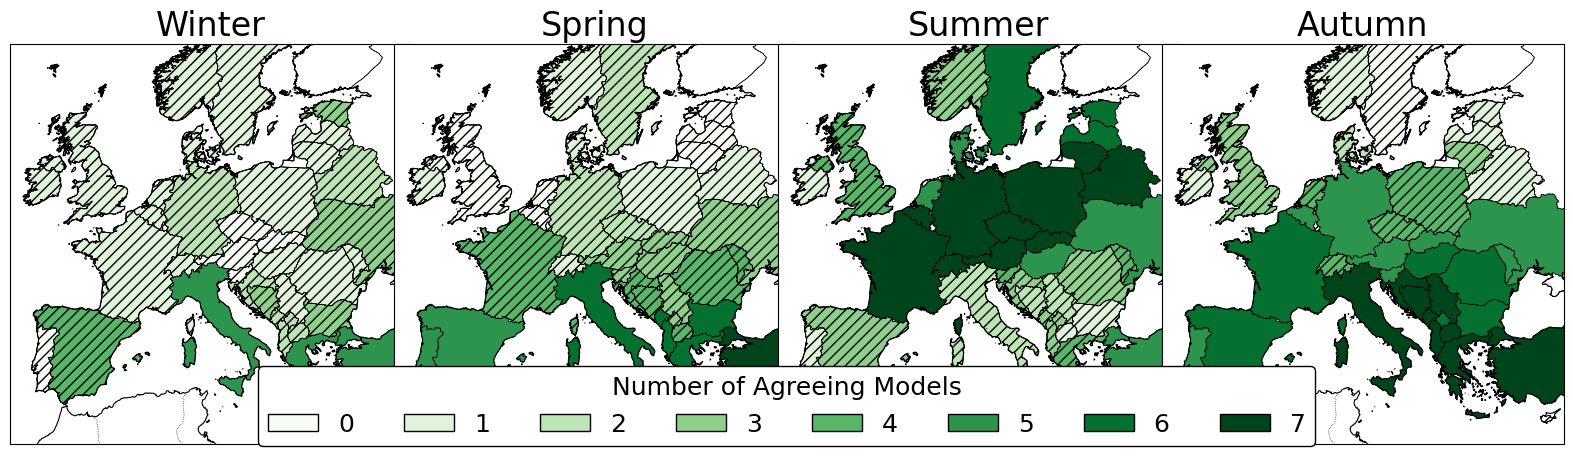

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm
import numpy as np

# (1) Load and prepare seasonal agreement data
summary = df_seasonal_agreement.copy()

# Define region codes
EU27 = [
    'AT','BE','BG','HR','CZ','DK','EE','FI','FR','DE','GR',
    'HU','IE','IT','LV','LT','LU','MT','NL','PL','PT','RO',
    'SK','SI','ES','SE','CY'
]
extras = ['GB','NO','BA','ME','RS','AL','MK','CH','IS','TR','UA','BY','MD','RU','XK']
region_codes = EU27 + extras

# (2) Load geometry
ne50 = "https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_countries.zip"
world = gpd.read_file(ne50).to_crs("EPSG:4326")
world.loc[world.NAME_LONG == 'France', 'ISO_A2'] = 'FR'
world.loc[world.NAME_LONG == 'Norway', 'ISO_A2'] = 'NO'
world.loc[world.NAME_LONG.str.contains('Kosov', na=False), 'ISO_A2'] = 'XK'
eu = world[world.ISO_A2.isin(region_codes)][['ISO_A2', 'geometry']].copy()

# (3) Colormap setup
maxm = int(summary['models_both'].max())
cmap = plt.get_cmap('Greens', maxm + 1)
norm = BoundaryNorm(np.arange(maxm + 2) - 0.5, maxm + 1)

# (4) Create 1×4 seasonal map layout
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
proj = ccrs.PlateCarree()
fig, axes = plt.subplots(1, 4, figsize=(20, 5), subplot_kw={'projection': proj})

for ax, season in zip(axes, seasons):
    df_seas = summary[summary['season'] == season]
    gdf = eu.merge(
        df_seas[['country', 'models_both']].rename(columns={'country': 'ISO_A2'}),
        on='ISO_A2', how='left'
    ).fillna({'models_both': 0})
    gdf['models_both'] = gdf['models_both'].astype(int)
    gdf.loc[gdf['ISO_A2'].isin(['RU', 'FI']), 'models_both'] = np.nan

    # Plot map
    gdf.plot(
        column='models_both',
        cmap=cmap, norm=norm,
        linewidth=0.5, edgecolor='black',
        ax=ax, missing_kwds={'color': 'white'}
    )

    # Hatch low-agreement countries
    low = gdf[gdf['models_both'] < 5]
    low.plot(
        facecolor='none', edgecolor='black',
        hatch='///', linewidth=0.5,
        ax=ax, zorder=3
    )

    # Map decorations
    ax.coastlines('10m', linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
    ax.set_extent([-12, 35, 33, 64], crs=proj)
    ax.set_title(season, fontsize=24, pad=6)
    ax.set_xticks([]); ax.set_yticks([])

    # Fix aspect ratio
    lat0 = (33 + 64) / 2
    ax.set_aspect(1 / np.cos(np.deg2rad(lat0)), adjustable='box')

# (5) Adjust layout
fig.subplots_adjust(
    left=0.02, right=0.98,
    top=0.92, bottom=0.12,
    wspace=-0.5, hspace=0
)

# (6) Discrete legend patches
patches = [
    mpatches.Patch(
        facecolor=cmap(i),
        edgecolor='black',
        label=str(i)
    )
    for i in range(maxm + 1)
]

fig.legend(
    handles=patches,
    title="Number of Agreeing Models",
    loc='lower center',
    ncol=min(10, maxm + 1),
    fontsize=18,
    title_fontsize=18,
    frameon=True,
    edgecolor='black',
    bbox_to_anchor=(0.5, 0.09),
    framealpha=1
)

# (7) Save and show
plt.savefig(
    "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/seasonal_agreement_power_and_drought_1x4.pdf",
    bbox_inches='tight', dpi=300
)
plt.show()
